In [2]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#Importing the data file
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
#Top 5 rows of the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#The data includes 15 features and 7668 observation
df.shape

(7668, 15)

In [6]:
# Displaying data-related information
#We can see that there are null values in different features and unsutable data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
#number of missing values in every feature

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
#dropping the null values is the best opation here
movie=df.dropna()


In [9]:
#Data shape after dropping the null values
movie.shape

(5421, 15)

In [10]:
#Data type of each feature
movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#changing some features types


movie['votes']= movie.votes.astype('int64')
movie['budget']= movie.budget.astype('int64')
movie['gross']= movie.gross.astype('int64')
movie.dtypes

<ipython-input-11-5dc69d583814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['votes']= movie.votes.astype('int64')
<ipython-input-11-5dc69d583814>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['budget']= movie.budget.astype('int64')
<ipython-input-11-5dc69d583814>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [12]:
#changing some features names for more understandable ones

movie.rename(columns={'name': 'movie_name', 'score': 'imdb_score', 'votes':'imdb_votes',
                   'star': 'main_star', 'released': 'realsing_date', 'gross': 'profits','company': 'prod_company'}, inplace=True)
movie.head()

C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,movie_name,rating,genre,year,realsing_date,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [13]:
#Spliting the realsing_date column to be used for more analysis later
movie[['realesing_date','realesing_country']] = movie.realsing_date.str.split("(",expand=True)


C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
movie.head()


,movie_name,rating,genre,year,realsing_date,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,realesing_date,realesing_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States)


In [15]:
#dropping unnesscery cloumns
movie.drop('realsing_date', axis=1,inplace=True )
movie.drop('year', axis=1, inplace=True )


C:\Users\halah\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
# removing the ')' from the realesing_country column
movie['realesing_country']=movie.realesing_country.str.replace(')', '')

<ipython-input-16-fe711db2bcdf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie['realesing_country']=movie.realesing_country.str.replace(')', '')
<ipython-input-16-fe711db2bcdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['realesing_country']=movie.realesing_country.str.replace(')', '')


In [17]:
#changing the date data type
movie['realesing_date']=pd.to_datetime(movie['realesing_date'])

<ipython-input-17-9901386a2fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['realesing_date']=pd.to_datetime(movie['realesing_date'])


In [42]:
movie.head()
movie.main_star.unique()

array(['Jack Nicholson', 'Brooke Shields', 'Mark Hamill', ...,
       'Elisabeth Moss', 'Ben Schwartz', 'Zhi-zhong Huang'], dtype=object)

In [19]:
#Dataset information after cleaning
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_name         5421 non-null   object        
 1   rating             5421 non-null   object        
 2   genre              5421 non-null   object        
 3   imdb_score         5421 non-null   float64       
 4   imdb_votes         5421 non-null   int64         
 5   director           5421 non-null   object        
 6   writer             5421 non-null   object        
 7   main_star          5421 non-null   object        
 8   country            5421 non-null   object        
 9   budget             5421 non-null   int64         
 10  profits            5421 non-null   int64         
 11  prod_company       5421 non-null   object        
 12  runtime            5421 non-null   float64       
 13  realesing_date     5421 non-null   datetime64[ns]
 14  realesin

In [20]:
#Sorting movies on the highest profits
sorted_movies_10=movie.sort_values(by=['profits'], inplace=False, ascending=False)
sorted_movies_10=sorted_movies_10.head(10)
sorted_movies_10

,movie_name,rating,genre,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,realesing_date,realesing_country
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States
7480,The Lion King,PG,Animation,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019-07-19,United States
6653,Jurassic World,PG-13,Action,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015-06-12,United States
6043,The Avengers,PG-13,Action,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012-05-04,United States
6646,Furious 7,PG-13,Action,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015-04-03,United States
7494,Frozen II,PG,Animation,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019-11-22,United States


Text(63.0, 0.5, 'Movie Main Stars')

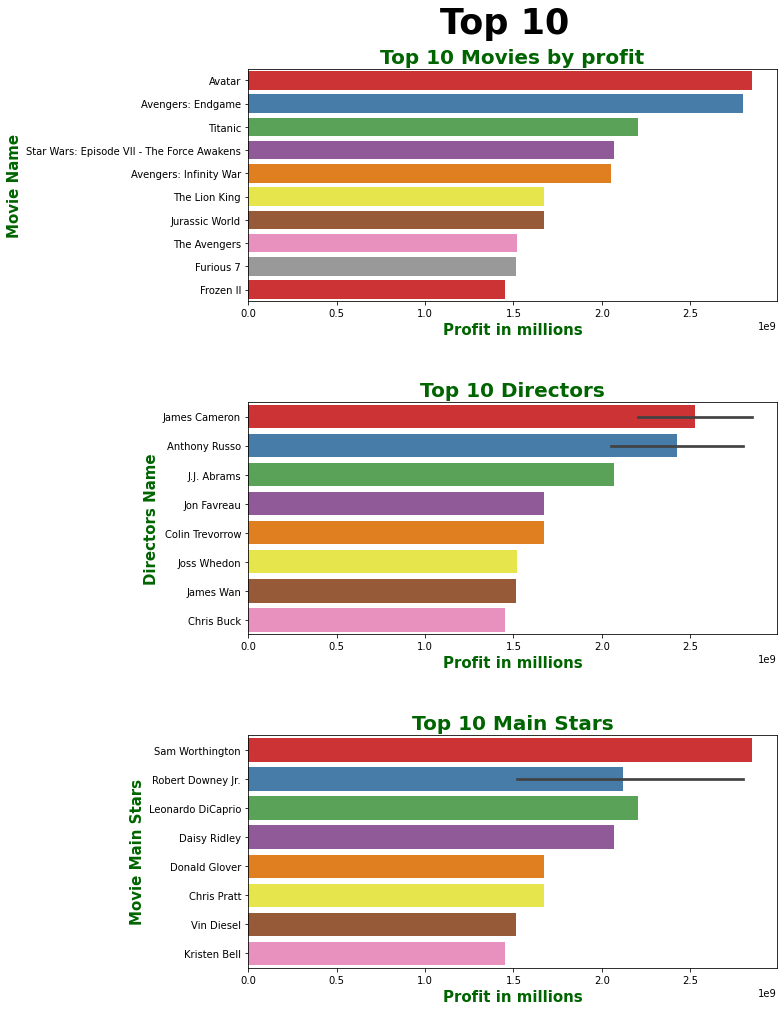

In [21]:
fig, axs= plt.subplots(3,1 , figsize=(10, 15))
fig.tight_layout(pad=8)
fig.suptitle('Top 10',fontsize=35,weight='bold', color='black')
top_movies=sns.barplot( y ='movie_name', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[0])
axs[0].set_title('Top 10 Movies by profit',fontsize=20,weight='bold', color='darkgreen')
axs[0].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')
axs[0].set_ylabel('Movie Name', fontsize=15, weight='bold', color='darkgreen')

top_director=sns.barplot( y ='director', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[1])
axs[1].set_title('Top 10 Directors',fontsize=20,weight='bold', color='darkgreen')
axs[1].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')
axs[1].set_ylabel('Directors Name', fontsize=15, weight='bold', color='darkgreen')


top_main_star=sns.barplot( y='main_star', x='profits', palette='Set1',data=sorted_movies_10, ax=axs[2])
axs[2].set_title('Top 10 Main Stars',fontsize=20,weight='bold', color='darkgreen')
axs[2].set_xlabel('Profit in millions', fontsize=15, weight='bold', color='darkgreen')
axs[2].set_ylabel('Movie Main Stars', fontsize=15, weight='bold', color='darkgreen')

# EDA


In [22]:
movie.describe()

,imdb_score,imdb_votes,budget,profits,runtime
count,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


**From the statics above we can see that the hightest profit for a movie is (2847246000$) and the lowest is (309$).
The maximum IMDb score is 9.30 and the minimum is 1.90
The maximum IMDb votes is 9.30 and the minimum is 195
The highest budget was(356000000$) and the lowest was (6000$)
The longest runtime was 271 min and the shortest was 61min

Text(0, 0.5, 'Number of Movies in this genre')

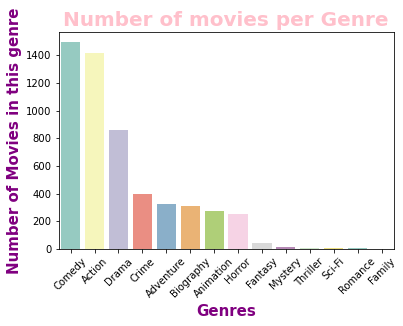

In [23]:
count_genre=movie['genre'].value_counts().head(14).reset_index()
count_genre
#figsize=(20, 20)
sns.barplot( x=count_genre.index, y=count_genre['genre'] , palette='Set3')
plt.xticks(list(range(14)), count_genre['index'], rotation = 45)
plt.title('Number of movies per Genre', fontsize = 20,weight='bold', color='pink')
plt.xlabel('Genres', fontsize = 15,weight='bold', color='purple')
plt.ylabel('Number of Movies in this genre', fontsize = 15, weight='bold', color='purple')


# we can see that the Comdey genre is the most genre here so will find if it's the most profitable gernre or not

In [24]:
sum_profit_per_genre=movie.groupby('genre').profits.sum().head(14).reset_index()
sum_profit_per_genre['profits']= sum_profit_per_genre.profits.astype('int64')
sum_profit_per_genre


,genre,profits
0,Action,237752868767
1,Adventure,43578711908
2,Animation,77865909110
3,Biography,19093930296
4,Comedy,88514817620
5,Crime,20017662162
6,Drama,52098564769
7,Family,2074332587
8,Fantasy,1635026609
9,Horror,14261055032


Text(0, 0.5, 'Sum of profits(Billions)')

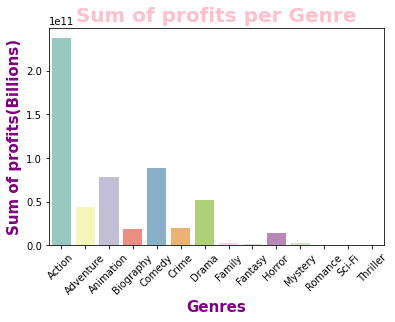

In [25]:
sns.barplot( x=sum_profit_per_genre['genre'], y=sum_profit_per_genre ['profits'], palette='Set3')
plt.xticks( rotation = 45)
plt.title('Sum of profits per Genre', fontsize = 20,weight='bold', color='pink')
plt.xlabel('Genres', fontsize = 15,weight='bold', color='purple')
plt.ylabel('Sum of profits(Billions)', fontsize = 15, weight='bold', color='purple')

#We can see that the Action genre is the most profitable genre

Text(0, 0.5, 'Number of Movies by Star')

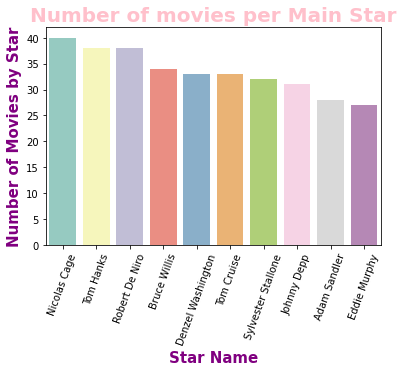

In [26]:
num_movie_per_main_actor=movie['main_star'].value_counts().sort_values(ascending=False).reset_index()
num_movie_per_main_actor=num_movie_per_main_actor.head(10)

sns.barplot( x=num_movie_per_main_actor.index, y=num_movie_per_main_actor['main_star'] , palette='Set3')
plt.xticks(list(range(10)), num_movie_per_main_actor['index'], rotation = 70)
plt.title('Number of movies per Main Star', fontsize = 20,weight='bold', color='pink')
plt.xlabel('Star Name', fontsize = 15,weight='bold', color='purple')
plt.ylabel('Number of Movies by Star', fontsize = 15, weight='bold', color='purple')

#number of movies per Main Star

# #Machin Learning

In this part, I will create a model that predicts the profits of a movie to help the production companies determine if the movie will be a success or not. I will use the Linear Reggreassion as the model.

1-I will find the corralation between the features and the target feature

2-I will select the more corrlated feature to be used in the model

In [27]:
movie.head()

,movie_name,rating,genre,imdb_score,imdb_votes,director,writer,main_star,country,budget,profits,prod_company,runtime,realesing_date,realesing_country
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States


Change the type of the nunnumerical data to numerical data to be used to indcate the correlation between the target and the other features.



In [131]:
movie1=movie.drop(['imdb_score','imdb_votes'], axis=1)
for i in movie1.columns:
    if(movie1[i].dtype == 'object'):
        movie1[i] = movie1[i].astype('category')
        movie1[i] = movie1[i].cat.codes
        
movie1.head()

,movie_name,rating,genre,director,writer,main_star,country,budget,profits,prod_company,runtime,realesing_date,realesing_country
0,4692,6,6,1795,2832,699,46,19000000,46998772,1426,146.0,1980-06-13,47
1,3929,6,1,1578,1158,214,47,4500000,58853106,452,104.0,1980-07-02,47
2,3641,4,0,757,1818,1157,47,18000000,538375067,945,124.0,1980-06-20,47
3,204,4,4,889,1413,1474,47,3500000,83453539,1108,88.0,1980-07-02,47
4,732,6,4,719,351,271,47,6000000,39846344,1083,98.0,1980-07-25,47


Text(0.5, 1.0, 'Movie1 Heat Map for the Features')

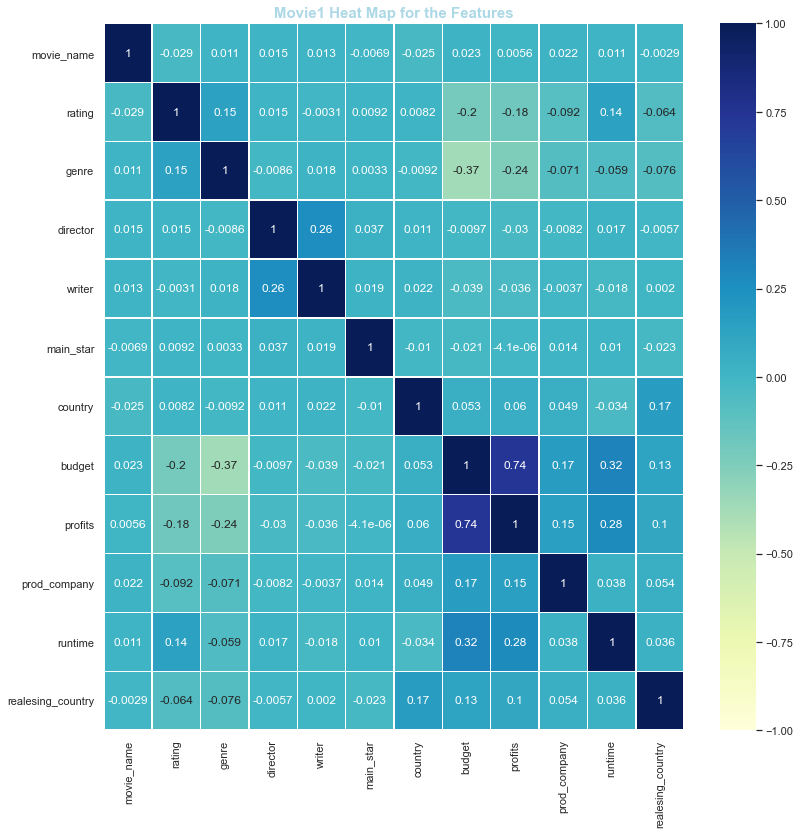

In [132]:
fig, ax = plt.subplots(figsize=(13,13)) 
correlation=movie1.corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu", vmin=-1, ax=ax, linewidths=.5)
plt.title('Movie1 Heat Map for the Features', size=15, weight= 'bold', color='lightblue')

Now we choose the croolated features.

In [134]:
target_corr = correlation["profits"]
corr_featurs = target_corr[target_corr>=0.5]
corr_featurs

budget     0.740247
profits    1.000000
Name: profits, dtype: float64

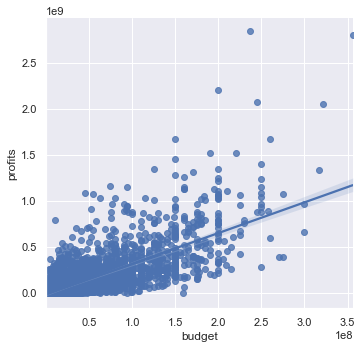

In [135]:
sns.set_theme()
sns.lmplot(x="budget", y="profits", data=movie1)

splitting the data to x and y(Target) and Training the model and gitting the R2

In [136]:
X=movie1['budget']
Y=movie1['profits']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.20)

X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

model= LinearRegression()
model_res=model.fit(X_train,Y_train)
r_sq = model_res.score(X_train, Y_train)
r_sq

0.5430822937368193

In [137]:
model_res.coef_

array([[3.28674734]])

In [138]:
model_res.intercept_

array([-15507845.44558264])

In [139]:
r_sq = model_res.score(X_test, Y_test)
r_sq

0.5621393023810662

In [172]:
y_pred =model_res.predict(X_test)
y_pred

array([[3.37933646e+07],
       [1.81696995e+08],
       [1.73596279e+07],
       ...,
       [1.98130732e+08],
       [4.36536066e+07],
       [1.25822290e+08]])